# 1. Bank Churn Prediction Modeling
## What is Churn?
Defined loosely, churn is the process by which customers cease doing business with a company. In this particular project, bank churn is how many customers left our bank.

This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.

When new customers begin buying and/or using a product, each new user contributes to a product’s growth rate. Inevitably some of those customers will eventually discontinue their usage or cancel their subscription; either because they switched to a competitor or alternative solution, no longer need to product’s functions, they’re unhappy with their user experience, or they can no longer afford or justify the cost. The customers that stop using/paying are the “churn” for a given period of time.

## Why is churn prediction important? 
Preventing a loss in profits is one clear motivation for reducing churn, but other subtleties may underlie a company’s quest to quell it. Most strikingly, the cost of customer acquisition usually starkly outweighs that of customer retention, so stamping out churn also compels from a more subtle financial perspective. 

While churn presents an obvious difficulty to businesses, its remedy is not always immediately clear. In many cases, and without descriptive data, companies are at a loss as to what drives it. Luckily, machine learning provides effective methods for identifying churn’s underlying factors and proscriptive tools for addressing it.

## 1.1 Problem Statement
>Just like any other business fratenity, a local bank has been seeing some customers leaving them at a rather increased rate and have tasked us with investigating which factors contribute to this customer churn, predict and offer some recommendations against the churn. So, **the objective** of this project ecompasses the following, in no particular order:
>* To identify factors that fuel customer churn based on available features;
>* To visualize those factors that lead to churn;
>* Later we want to build a churn predictive model which will perform the following tasks:
     >> - Identify customers who pose a risk of leaving the bank
     >> - Use the model on each current customer to predict whether they are at risk of leaving
> ### Possible Questions to ask
>- What factors influence customer churn
>- Does Data Visualization offer better insights into the data?
>- What hidden patterns can we reveal from the dataset?
>- Data segnmentation Analysis: Which group seems to be churning more? $e.t.c.$

## 1.2 About The Dataset
>The dataset we will use in this project can be found [here](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers). We will dive deeper into the features involved in our data.

 ## 1.3 Methodology
>- **Step 1- Data collection:** This will involve scrapping of structured datafrom the source.
>- **Step 2- Data Preprocessing:** In this phase, the data is prepared for the analysis purpose which contains relevant information. **Pre-processing** and **data cleaning** are some of the most important tasks that must be done before dataset can be used for machine learning. The real-world data is _noisy_, _incomplete_ and _inconsistent_. So, it is of paramount importance to clean it for optimized and realiable machine learning models.
>- **Step 3- Feature Extraction Set/Training Data:** Feature set or training data can be prepared from the cleaned data by using any of the available
techniques. The feature sets and training set that has obtained by using any method will be used for the implementation of machine learning algorithms.
>- **Step 4- Implementation of Machine Learning Algorithm on Feature Set/Training Data:** 
>- **Step 5: Testing of Data:** Testing of data is done based on training model which is classified using supervised learning algorithm.

 ## 1.4 Experimental Design
>- We will use static data- dataset already available rather than real-time data from an IoT system.
Links to the Datasets

## 1.5 Software tools & Hardware Requirements: 
>- Jupyter Notebook, 
>- Python3 Liraries such as [NumPy](https://numpy.org/doc/stable/user/quickstart.html), [Pandas](https://pandas.pydata.org/docs/), [Matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [Seaborn](https://seaborn.pydata.org/) 
>- Supervised Learning libraries such [Scikit-Learn](https://scikit-learn.org/stable/)
  ... will be exploited for the development and experimentation of the project. 
  

---
---
# 2. Data Collection & Loading
>The first step in the Machine Learning process is getting data.
 > ## 2.1 Importing Neccessary Libraries

In [154]:
# For data cleaning/wrangling
import numpy as np      # vectors and matrices || Linear Algebra
import pandas as pd     # tables and data manipulations 

# Visualization Libraries
import matplotlib.pyplot as plt # plots
import seaborn as sns           # attractive plots
#plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
#sns.set(palette="Set2")

# To have graphs embedded in the notebook
%matplotlib inline

# Big Data Libraries
import tensorflow as tf
#import keras


# For better tables outputs
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

> ## 2.2 Data Ingestion

In [85]:
# Read the csv file
df = pd.read_csv("Churn_Modelling.csv", delimiter=',')

# 3. Data Preprocessing
>#### What is it?
>- According to [Techopedia](https://www.techopedia.com/definition/14650/data-preprocessing), **Data Preprocessing** is a Data Mining technique that involves transforming raw data into an understandable format.
>#### Why Do We Need Data Preprocessing?
>- Since real-world data tends to be incomplete, noisy or inconsistent, we need this process in order to eliminate such to avoid poor quality models we'll build later. 
>- Data Preprocessing provides operations which can organise the data into a proper form for better understanding in data mining process.
>#### Stages of Data Preprocessing
Data preprocessing is divided into four stages: 
    1. Data cleaning, 
    2. Data integration, 
    3. Data reduction, and 
    4. Data transformation.
    
> ## 3.1 Data Cleaning & Inspection
>#### What is Data Cleaning?**
>In Data Science, data cleaning can be described in many ways, one of them being: 
<font color=purple>***the process of fixing and/or removing incorrect, corrupted, wrongly-formatted, incomplete or duplicate data within a dataset***.</font>

>Quite mouthful and yet comprehensive. We want to ensure that our dataset has no duplicate data or does not contain any corrupted entries that will otherwise lead to wrong/less useful models. 

>As we make use of multiple data sources in data analysis, the chances of duplicating data are very high, and so are those of mislabeling the data. It goes without saying that incorrect data leads to unreliable algorithms and predictions or outcomes. While there are no sure steps of going about data cleaning due to the nature of different datasets, it is however vital to build some sort of a framework or template for data cleaning process for future references so as to at least be close to doing it right each time.

>> ### 3.1.1 Exploring the Dataset: *Understanding the data*
 With the data fed into our notebook, it's time we take a look at it: we need to spend some time exploring it in order to understand what the features represent in each column. We want to avoid or at least minimize mistakes in the data analysis and the modeling process. 

>>Without any further ado, let's dive right into our loaded dataset.


In [86]:
# Check the first 5 entries
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


>> ### 3.1.2 Featues of the Dataset:
>> #### Columns in the dataset

In [87]:
# Print out columns in the dataset
pd.DataFrame(df.columns, columns=["Column Names"]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Column Names,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


>> #### <CENTER>Column Descriptions</CENTER>
>>|$RowNumber$ | corresponds to the record (row) number and has no effect on the output. This column will be removed. |
| :-| :-|
| $CustomerId$ | contains random values and has no effect on customer leaving the bank. This column will be removed
|$Surname$|the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
|$CreditScore$|can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
|$Geography$|a customer's location can affect their decision to leave the bank. We'll keep this column.
|$Gender$|it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.
|$Age$|this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
|$Tenure$|refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
|$Balance$|also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
|$NumOfProducts$|refers to the number of products that a customer has purchased through the bank.
|$HasCrCard$|denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
|$IsActiveMember$|active customers are less likely to leave the bank, so we'll keep this.
|$EstimatedSalary$|as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
|$Exited$|whether or not the customer left the bank. This is what we have to predict.
| :-| :-|

>> ### 3.1.3 Size of the dataset: How many entries are in our dataset?

In [88]:
# How many rows and columns in the dataset?
# Check the number of rows and columns
print("There are ", df.shape[0], "rows and", df.shape[1], "columns/features.")

There are  10000 rows and 14 columns/features.


### $Observation$
- We have $10000$ entries (subjects/users) and $14$ features (columns).

>> ### 3.1.4 Missing Data: 
- **Do we have missing data under each feature?**


In [89]:
# Check if there's missing data
# Turn it into a dataframe
pd.DataFrame(df.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### $Observation$
- It looks like our dataset has no missing values.

>> ### 3.1.5 Statistical Description of the dataset
- **Looking at only Numerical Columns, what are some basic statistical observations?**


In [90]:
# Describe the statistical elements of the dataset
df.describe().T#.T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### $Observation$
>The above returns important descriptive statistical summaries for only numerical columns, excluding NaN values (if available).
> #### Parameters:
> * **percentiles:**The percentiles to include in the output. All should fall between 0 and 1. The default is <font color=darkpink>[.25, .5, .75]</font>, which returns the 25th, 50th, and 75th percentiles.

>> ### 3.1.6 Statistical Description of the dataset
- **Looking at only Categorical Columns, what are some basic statistical observations?**


In [91]:
# Just categorical columns
df.describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


>### $Observation$
>The above returns important descriptive statistical summaries for only columns that hold object datatype (categorical in nature), excluding NaN values (if available).
---
---
# 4. Exploratory Data Analysis
## <center>Multivariate Data Analysis</center>
>According to a very insightful article by Prasad Patil on [Towards Data Science](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15), Mr Patil stated that
> <font color = blue>
    <i>Exploratory data analysis is simply the process of performing initial investigations on data to discover pattern, anomalies with the aid of graphical representations and summary statistics</i>
</font>

>It is worth noting that EDA is not really a formal process with rigid set of rules or path to follow, it is waht one makes it. The aim is to uncover whatever may be hidden in the data, so one should feel free to investigate whatever idea that comes to mind. Of course some ideas will yield some positive outcomes, others not so much. To successfully perform data cleaning, we'll need to deploy EDA tools such as visualisation, transformation and modelling. 

> ## 4.1 Dropping Unnecessary Columns
> - We can see that `RowNumber` and `CustomerID` columns are unnecessary and can be dropped.
> - The same applied to the `Surname` column as we are not interested in who left the bank but other factors that led them to leaving.

In [92]:
# Drop and reassign dataframe
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1 )

# View first few 5 rows
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


> ## 4.1 Credit Score
> Let us try to see the relationship of credit score and exit status:
> - #### Do customers with lower credit scores exit more?
> - #### Do customers with higher credit scores tend to stay with our bank?

>> ### 4.1.1 Creating Credit Score Based On FICO ranges
>>The most commonly used scoring models have a credit score range of 300 to 850. Creditors set their own standards for what scores they'll accept, but these are general guidelines:
>> - A score of 720 or higher is generally considered excellent credit.
>> - A score between 690 and 719 is considered good credit.
>> - Scores between 630 and 689 are fair credit.
>> - And scores below 629 are poor credit.

In [93]:
df['CreditScoreGroup'] = pd.cut(df.CreditScore, 
                           bins = [300, 579, 669, 739, 799, 850],
                           labels=[0, 1, 2, 3, 4]) # 0=Very Poor, 1 = Fair, 2=Good, 3=Very Good, 4=Exceptional
df['CreditScoreGroup'] = df.CreditScoreGroup.astype(int)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,4


In [94]:
very_poor = df.query('CreditScore >= 300 and CreditScore <= 579')#.count()

fair = df.query('CreditScore >= 580 and CreditScore <= 669')#["CreditScore"]#.max()#.count()

good = df.query('CreditScore >= 670 and CreditScore <= 739')#.count()

very_good = df.query('CreditScore >= 740 and CreditScore <= 799')#.count()

exceptional = df.query('CreditScore >= 800 and CreditScore <= 850')#.count()

# Print Number of Customers in different FICO Score Ranges 
print("There are", very_poor["CreditScore"].count(), "customers with very poor credit score.")
print("There are", fair["CreditScore"].count(), "customers with fair credit score.")
print("There are", good["CreditScore"].count(), "customers with good credit score.")
print("There are", very_good["CreditScore"].count(), "customers with very good credit score.")
print("There are", exceptional["CreditScore"].count(), "customers with exceptional credit score.")

There are 2362 customers with very poor credit score.
There are 3331 customers with fair credit score.
There are 2428 customers with good credit score.
There are 1224 customers with very good credit score.
There are 655 customers with exceptional credit score.


Text(0.5, 1.0, 'Credit Score Groups vs. Churn Status')

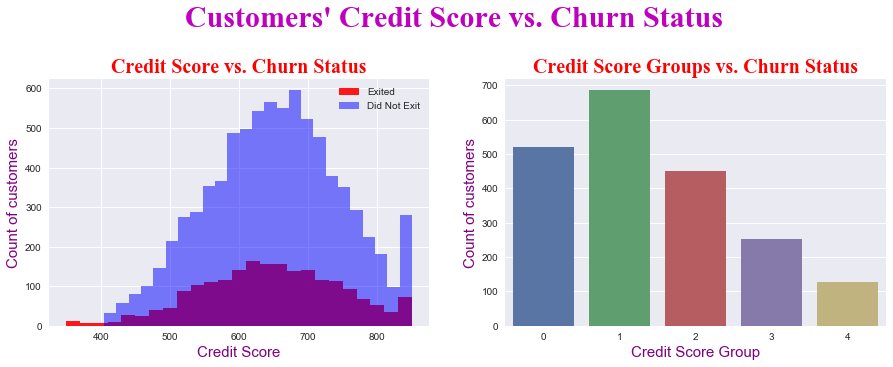

In [95]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.suptitle("Customers' Credit Score vs. Churn Status", fontname ='Times New Roman', 
          size = 30, color ='m')

plt.subplot(2,2,1)
plt.hist(df[df["Exited"]==1]["CreditScore"], bins=25, alpha=0.9, color="red", label="Exited")
plt.hist(df[df["Exited"]==0]["CreditScore"], bins=25, alpha=0.5, color="blue", label="Did Not Exit")

plt.xlabel("Credit Score", size = 15, color = "purple")
plt.ylabel("Count of customers", size = 15, color = "purple")
plt.title("Credit Score vs. Churn Status", color="red", fontname = "Times New Roman", size = 20)
plt.legend();
plt.subplot(2,2,2)
# Bar plot of Different Credit Score Group Vs Exited feature
sns.countplot(x = 'CreditScoreGroup', data = df[df["Exited"] == 1])
plt.xlabel("Credit Score Group", size = 15, color = "purple")
plt.ylabel("Count of customers", size = 15, color = "purple")
plt.title("Credit Score Groups vs. Churn Status", color='red', fontname = "Times New Roman", size = 20)

>### $Observation$
- We see that most customers who exited the bank had very poor and fair credit score.

> ## 4.2 Retained $vs.$ Churned Customers Percentage

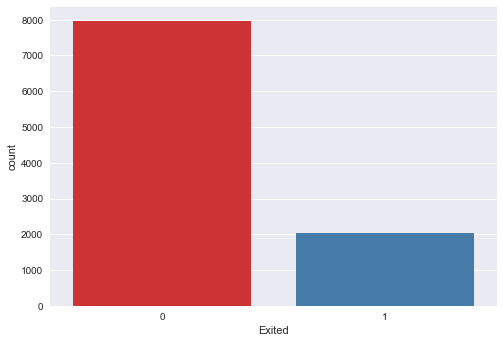

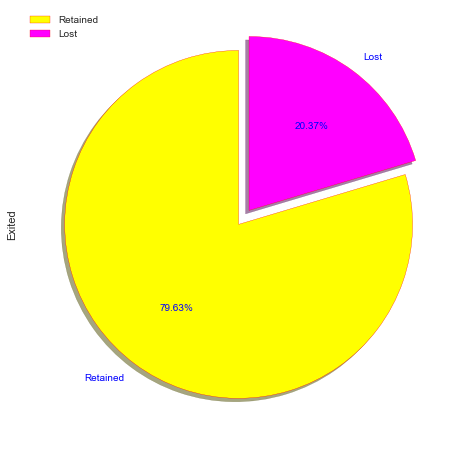

,Exited
0,7963
1,2037


In [96]:
plt.style.use('seaborn')

churned = pd.DataFrame(df['Exited'].value_counts())

#plt.subtitle("Retained vs Lost Customers Percentage Distribution ", fontname ='Times New Roman', 
          #size = 22, color ='purple')

# CountPlot
sns.countplot(x='Exited', data=df, palette="Set1")
plt.style.use('seaborn')
# Pie Chart 
explode = (0.0, 0.1)
colors = ['yellow', 'magenta']
labels = 'Retained', 'Lost'
churned.plot.pie(y='Exited', figsize=(8,8), colors = colors, 
                 autopct='%1.2f%%', textprops={'color':"b"}, explode=explode, 
                 startangle=90, shadow=True, labels=labels, wedgeprops={'edgecolor': 'red'})
plt.show()
churned

>### $Analysis$
- <font color='blue'>$\implies$</font>We see that we lost about 20% of the customers (2037 out of 10000) and retained about 80%(7963 customers out of 10000).
- Our goal is to predict churn rate, so it is important that whatever model we choose at the end predicts this 20%.

> ## 4.3  Demographic Segmentation Analysis & Churn
> ### 4.3.1 Geographical Segmentation Analysis
> - #### Which countries do the bank clients come from?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



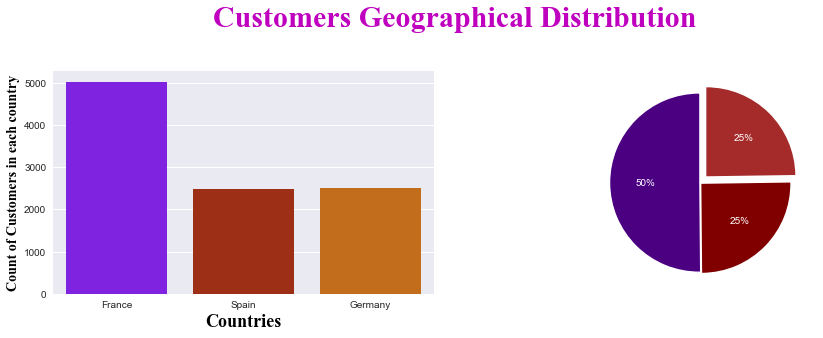

In [97]:
plt.style.use('seaborn')
plt.figure(figsize=(15,9))

# Customers in Each Country
clients = pd.DataFrame(df.Geography.value_counts())

# Set Title for both subplots
plt.suptitle("Customers Geographical Distribution ", size = 30, 
             fontname = "Times New Roman", color = "m")

# Count Plot
plt.subplot(2, 2, 1)
sns.countplot(x="Geography", data = df, palette="gnuplot")
plt.xlabel("Countries", size = 18, fontname = "Times New Roman", color = "k")
plt.ylabel("Count of Customers in each country", size = 14, fontname = "Times New Roman", color = "k")

# Pie Chart
plt.subplot(2, 2, 2)
explode = (0.01, 0.02, 0.1)
labels = 'France', 'Spain', 'Germany'
pieplot = plt.pie(clients, autopct = '%1.0f%%', explode = explode, startangle = 90,
                  textprops={'color':"w"}, colors = ['indigo', 'maroon', 'brown'],
                  labels=labels)

plt.show()

> - #### How many Customers from each Country?

In [98]:
# Call the dataframe
clients 

,Geography
France,5014
Germany,2509
Spain,2477


> ### $Analysis$
> - The customers belong to three different geographical locations: France, Spain, and Germany. While almost 50% of the total customers are French, the number of Spanish and German customers is around 25% each.

> ### Geographical Segmentation & Churn
> - #### Which country had the highest churn rate?
$\implies$ To find the impact of geography on customer churn, we can plot the count of values from the **`Exited`** column against a customer’s geography:

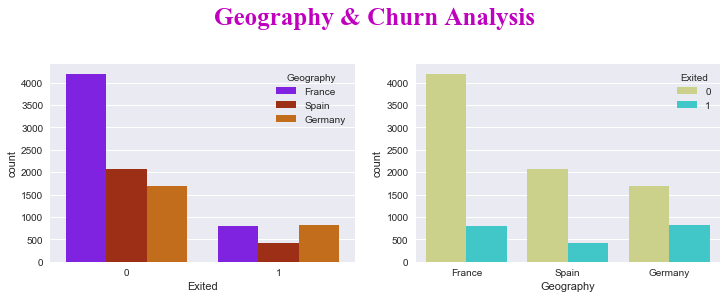

In [99]:
plt.figure(figsize=(12,8))
plt.suptitle("Geography & Churn Analysis", size = 25, fontname = "Times New Roman", color = "m")

# First Plot
plt.subplot(2, 2, 1)
sns.countplot(x='Exited', hue='Geography', data=df, palette="gnuplot")

# 2nd Plot
plt.subplot(2, 2, 2)
sns.countplot(x='Geography', hue='Exited', data=df, palette="rainbow_r")


>### $Analysis$
- We see that the bank lost more customers in Germany than elsewhere among the 3 involved nations, despite 50% of the customers hailing from France, and Germany housing the least number of customers.
>- That is to say, Germany has the least amount of customers for this bank, but more customers left the bank.
>- Perhaps the bank is not performing so well in Germany that it continues to lose customers.
>- We can also assume this is a French bank, and that customers are sticking with the local banks and are also defecting to local banks in Germany.
>- The output shows that among the customers who left the bank, French and German customers have an equal number despite the fact that the total German customers are almost half of the total French customers.
> - It shows that German customers are more likely to leave the bank than French and Spanish customers. 


In [100]:
# Get Customers From Spain
spain_bank = df.query('Geography == "Spain"')
france_bank = df.query('Geography == "France"')
germany_bank = df.query('Geography == "Germany"')

In [101]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [102]:
data = dict(
        type = 'choropleth',
        colorscale = 'rainbow',
        locations = df['Geography'],
        locationmode = "country names",
        z = df['Exited'],
        text = df['Geography'],
        colorbar = {'title' : 'Customers'},
      )

layout = dict(title = 'Customer Locations',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)


> ### Geographical Churn Rate Analysis
- Let us take a lot at churn rates for both genders, and overall churn rate.

In [103]:
# Get total Churn
total_churn = df.query('Exited == 1').count()["Exited"]
##################################################################################################################
# Get Geography And Churn Status
# France Churn 
france_churn_number = df.query('Geography == "France" & Exited == 1').count()["Exited"]
# France Churn Rate
france_churn_rate = round((france_churn_number/total_churn)*100, 2)

# Germany Churn 
germany_churn_number = df.query('Geography == "Germany" & Exited == 1').count()["Exited"]
# Germany Churn Rate
germany_churn_rate = round((germany_churn_number/total_churn)*100, 2)

# Germany Churn 
germany_churn_number = df.query('Geography == "Germany" & Exited == 1').count()["Exited"]
# Germany Churn Rate
germany_churn_rate = round((germany_churn_number/total_churn)*100, 2)

# Spain Churn 
spain_churn_number = df.query('Geography == "Spain" & Exited == 1').count()["Exited"]
# Spain Churn Rate
spain_churn_rate = round((spain_churn_number/total_churn)*100, 2)

##################################################################################################################
# Create Churn Rate DataFrame
# Generate List of Lists
geo_churn_data = [['France', france_churn_rate], ['Germany', germany_churn_rate], ['Spain', spain_churn_rate]]

# Create the Pandas DataFrame
geo_churn_df = pd.DataFrame(geo_churn_data, columns = ["Country", "Churn Rate (%)"])
# Call the dataframe
geo_churn_df

,Country,Churn Rate (%)
0,France,39.76
1,Germany,39.96
2,Spain,20.27


>### $Analysis$
>- Spain saw the least churn rate, while (as we said) Germany had the highest churn rate. 
>- In fact, we see something new- Germany and France had almost the same churn rates  but we could argue that for France that's because there are more bank users based there than elsewhere. 

> ### 4.3.2  Gender Segmentation Analysis
> We want to understand the Gender groups of the customers of the bank and see which gender seems likely to leave the bank (if it can be uncovered from the data).
> ####  Gender, Geography and Number of Churned customers
> - Let's dive into how many females or males left the bank and from which country did we see the highest rate of churn.
> - We also want to see if males or females are likely to leave the bank or gender has nothing to do with bank churn.
> - We will put the dataframes of both genders side-by-side for easier comparison

In [104]:
# Group Data By Gender, Geography And Churn Status
grouped_data = df.groupby(["Gender","Exited", "Geography"]).count()

# Turn the grouped Data into a dataframe
seg = pd.DataFrame(grouped_data["Age"])

# Rename the column 
seg.columns = ["Count"]

# get Only Data about Churned Females
female = seg.query('Gender == "Female" and Exited == 1')

# get Only Data about Churned Males
male = seg.query('Gender == "Male" and Exited == 1')

# Call the new dataframes side-by-side

# Set Stylers
female_styler = female.style.set_table_attributes("style='display:inline'").set_caption("Female Table")
male_styler = male.style.set_table_attributes("style='display:inline'").set_caption("Male Table")

# First Import display_html
from IPython.display import display_html 

# Output the tables
display_html(female_styler._repr_html_()+male_styler._repr_html_(), raw=True)

Female Table Count Gender Exited Geography 
 
 Female 
 1 
 France 
 460 
 
 
 Germany 
 448 
 
 
 Spain 
 231 
 
 Male Table Count Gender Exited Geography 
 
 Male 
 1 
 France 
 350 
 
 
 Germany 
 366 
 
 
 Spain 
 182

>### $Analysis$

| **France** | More female bank users left than male users|
| :- | :- |
| **Germany** | Once again, more female bank users left than male users|
| **Spain** | AND once more, more female bank users left than male users|

>#### $Conclusion$
- We could say that females are more likely to leave a bank than male users. 

>**The biggest question is: among these three countries, which gender is more predominant in terms of bank use?**

In [105]:
print("There are", df.query('Gender == "Female"')["Gender"].count(), "females and \n", df.query('Gender == "Male"')["Gender"].count(),"male bank users in this dataset.") 

There are 4543 females and 
 5457 male bank users in this dataset.


>### $ Analysis$
>- Despite having fewer female bank users, upon going back to the churn rate of the genders, we see that females seem slightly highly likely to leave the bank. 

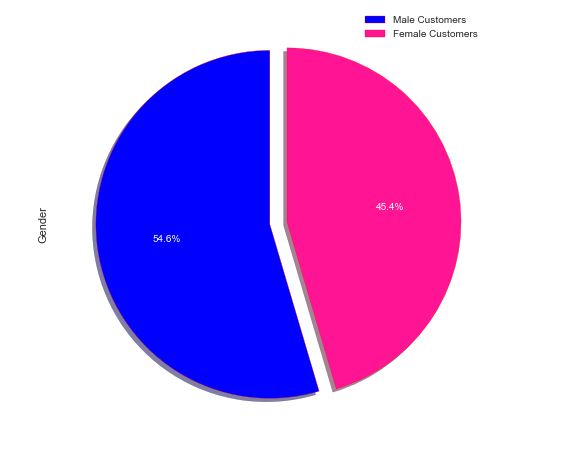

,Count
Male,5457
Female,4543


In [106]:
plt.style.use('seaborn')

gender = pd.DataFrame(df['Gender'].value_counts())

# Pie Chart 
explode = (0.0, 0.1)
colors = ['blue', 'deeppink']
labels = 'Male Customers', 'Female Customers'
gender.plot.pie(y='Gender', figsize=(8,8), colors = colors, 
                 autopct='%1.1f%%', textprops={'color':"w"}, explode=explode, 
                 startangle=90, shadow=True, labels=labels, wedgeprops={'edgecolor': 'red'})
plt.show()
# Rename the columns
gender.columns = ["Count"]
gender

>### $ Analysis$
- The above pie chart just summarizes for us the gender segmentation of users in these 3 different countires.
- As we have already seen, 55% of users are male and the other 45% are females. 

> ### 4.3.3  Churn Rate Analysis
> ### Gender Churn Rate Analysis
- Let us take a lot at churn rates for both genders, and overall churn rate.

In [107]:
# Get total Churn
total_churn = df.query('Exited == 1').count()["Exited"]

# Get Gender And Churn Status
# Female Churn 
female_churn_number = df.query('Gender == "Female" & Exited == 1').count()["Exited"]
# Female Churn Rate
female_churn_rate = round((female_churn_number/total_churn)*100, 2)

# Male Churn 
male_churn_number = df.query('Gender == "Male" & Exited == 1').count()["Exited"]
# Male Churn Rate
male_churn_rate = round((male_churn_number/total_churn)*100, 2)

# Create Churn Rate DataFrame
# Generate List of Lists
churn_data = [['Female', female_churn_rate], ['Male', male_churn_rate]]

# Create the Pandas DataFrame
churn_df = pd.DataFrame(churn_data, columns = ["Gender", "Churn Rate (%)"])
churn_df

,Gender,Churn Rate (%)
0,Female,55.92
1,Male,44.08


>### $ Analysis$
- Just as we have hinted, we do see that churn rate for female bank users (55.9%) is higher than that of males (44.1%).


>- So more females leave the bank than males.

> ### Overall Churn Rate

In [108]:
# Calculate Overall Churn Rate
overall_churn_rate = round(((total_churn/df.Exited.count())*100), 2)

# Print the rate
print("Overall Churn Rate is", overall_churn_rate,"%")

Overall Churn Rate is 20.37 %


>### $Analysis$
- All in all, for both genders, overall churn rate is 20.37%. 
- This is the number we want to bring down, that is we aim to improve services in the bank so that people can stay with the bank. For example, it would be a huge improvement to have a churn rate of 10% after improving the bank and service delivery.

> ### 4.3.4 Age Segmentation Analysis
> #### How old is the oldest bank client in this dataset?

In [110]:
print("The oldest bank customer in this dataset is",df.Age.max(),"years old.")

The oldest bank customer in this dataset is 92 years old.


> ### Create Age Groups Based off of available ages
> We will use the following age groups:

|Youth(0)| Adults(1) | Seniors(2)|
| :- | :- | :- |
| 18 - 24|25 - 64|65 & Above|

In [111]:
# Create Groups
df['AgeGroup'] = pd.cut(df.Age, 
                           bins = [17, 24, 64, 120],
                           labels=["youth", "adult", "senior"])
# Turn the column data type into a string
df['AgeGroup'] = df.AgeGroup.astype(str)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,adult
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,adult
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,adult
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,adult
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,4,adult


In [112]:
# Create Age Groups DataFrames
youth = df.query('Age >= 18 and Age <= 24')
adult = df.query('Age >= 25 and Age <= 64')
senior = df.query('Age >= 65')

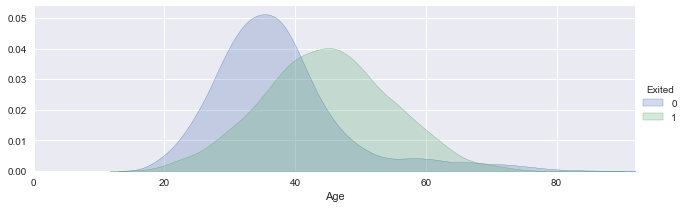

In [113]:
facet = sns.FacetGrid(df, hue="Exited", aspect=3)
facet.map(sns.kdeplot,"Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()

plt.show()

> #### How youths, adults and seniors exited the bank? We also want to find out which group had the highest churn rate.

In [114]:
# Get total Churn
total_churn = df.query('Exited == 1').count()["Exited"]

# Get Age Group And Churn Status
# Youth Churn 
youth_churn_number = df.query('AgeGroup == "youth" & Exited == 1').count()["Exited"]
# Youth Churn Rate
youth_churn_rate = round((youth_churn_number/total_churn)*100, 2)

# Adult Churn 
adult_churn_number = df.query('AgeGroup == "adult" & Exited == 1').count()["Exited"]
# Adult Churn Rate
adult_churn_rate = round((adult_churn_number/total_churn)*100, 2)

# Senior Churn 
senior_churn_number = df.query('AgeGroup == "senior" & Exited == 1').count()["Exited"]
# Adult Churn Rate
senior_churn_rate = round((senior_churn_number/total_churn)*100, 2)

# Create Churn Rate DataFrame
# Generate List of Lists
age_churn_data = [['Youth', youth_churn_number, youth_churn_rate], ['Adult', adult_churn_number, adult_churn_rate], ['Senior', senior_churn_number, senior_churn_rate]]

# Create the Pandas DataFrame
age_churn_df = pd.DataFrame(age_churn_data, columns = ["Age Group", "Churn per Group", "Churn Rate(%)"])
age_churn_df

,Age Group,Churn per Group,Churn Rate(%)
0,Youth,40,1.96
1,Adult,1954,95.93
2,Senior,43,2.11


>### $Analysis$
- Young people and seniors seem less likely to leave the bank
- Adults (between 25 and 64) have a higher probability to leave the bank, for various reasons.


> ### 4.3.5 Bank Balance and Churn
- Let's try see if we have bank users who exited yet they still had money with the bank.
> #### How many bank users with no balance in the bank and exited the bank?

In [115]:
# Get Balance And Churn Status
# No Balance & Churn
no_bal = df.query('Balance == 0 & Exited == 1')#.count()["Exited"]

# With Balance & Exited
bal = df.query('Balance > 0 & Exited == 1')#.count()["Exited"]

# Churn Rates
no_bal_churn_rate = round((no_bal.Exited.count()/total_churn)*100, 2)
bal_churn_rate = round((bal.Exited.count()/total_churn)*100, 2)

# Create Balance vs. Churn DataFrame
# Generate List of Lists
bal_churn_data = [['Zero Balance', no_bal.Exited.count(), no_bal_churn_rate], ['With Balance', bal.Exited.count(), bal_churn_rate]]

# Create the Pandas DataFrame
bal_churn_df = pd.DataFrame(bal_churn_data, columns = ["Balance Status", "Churn Numbers","Churn Rate(%)"])
bal_churn_df

,Balance Status,Churn Numbers,Churn Rate(%)
0,Zero Balance,500,24.55
1,With Balance,1537,75.45


> ### $Analysis$
- There are more users with a bank balance exiting than those without a bank balance.

> ### 4.3.6 Credit Card and Churn
- Let's see how many customers with and without credit cards exited

Text(0.5, 0, 'Credit Card Possession Status')

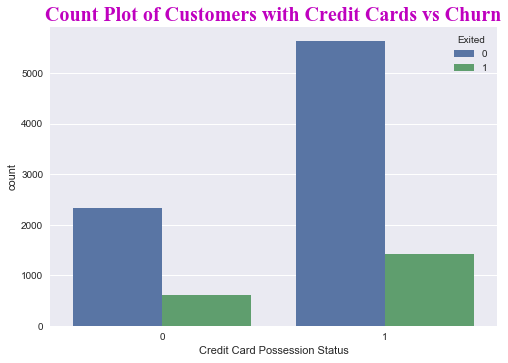

In [116]:
sns.countplot(x="HasCrCard", hue = "Exited", data = df).set_title("Count Plot of Customers with Credit Cards vs Churn", fontname = "Times New Roman", size = 20, color="m")
plt.xlabel("Credit Card Possession Status")

In [117]:
# Get total Churn
total_churn = df.query('Exited == 1').count()["Exited"]

# Get Credit Card Status And Churn Status
# With Credit Card Churn 
crcard_churn_number = df.query('HasCrCard == 1 & Exited == 1').count()["Exited"]
# With Credit Card Churn Rate
crcard_churn_rate = round((crcard_churn_number/total_churn)*100, 2)

# Without Credit Card Churn 
cr_churn_number = df.query('HasCrCard == 0 & Exited == 1').count()["Exited"]
# Without Credit Card Churn Rate
cr_churn_rate = round((cr_churn_number/total_churn)*100, 2)

# Create Churn Rate DataFrame
# Generate List of Lists
cr_churn_data = [['No CrCard', crcard_churn_rate], ['Has CrCard', cr_churn_rate]]

# Create the Pandas DataFrame
cr_churn_df = pd.DataFrame(cr_churn_data, columns = ["CrCard Status", "Churn Rate (%)"])
cr_churn_df

,CrCard Status,Churn Rate (%)
0,No CrCard,69.91
1,Has CrCard,30.09


>### $Analysis$
- 70% of customers with no credit cards leave the bank
- 30% of customers with credit cards still leave the bank.

> ### 4.3.7 Number of Products and Churn
- Let's see if having more bank products keep clients

Text(0.5, 1.0, 'Products Number Count Plot')

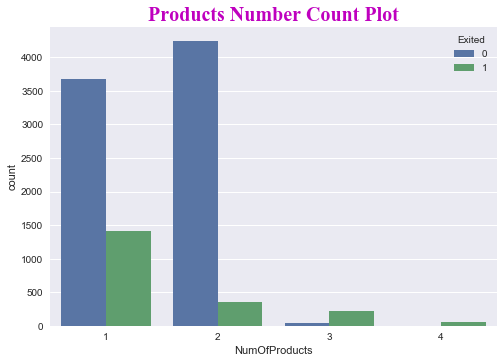

In [118]:
sns.countplot(x="NumOfProducts", hue = "Exited", data = df).set_title("Products Number Count Plot", fontname = "Times New Roman", size = 20, color="m")

> ### $Analysis$
- We see that it is while most customers with one product were second safest bet, they still posed a threat of churn.
- That is, Even though customers with 1 product were relatively riskier than those with 2, the majority would still be a safe bet in terms of customer retention.

> ### 4.3.8 Tenure $vs.$ Churn: 
> #### Is there a correlation between the number of years using the bank and churn?
- Does staying longer with the bank help keep customers/or prevents churn?

Text(0.5, 1.0, 'Tenure vs. Churn Count Plot')

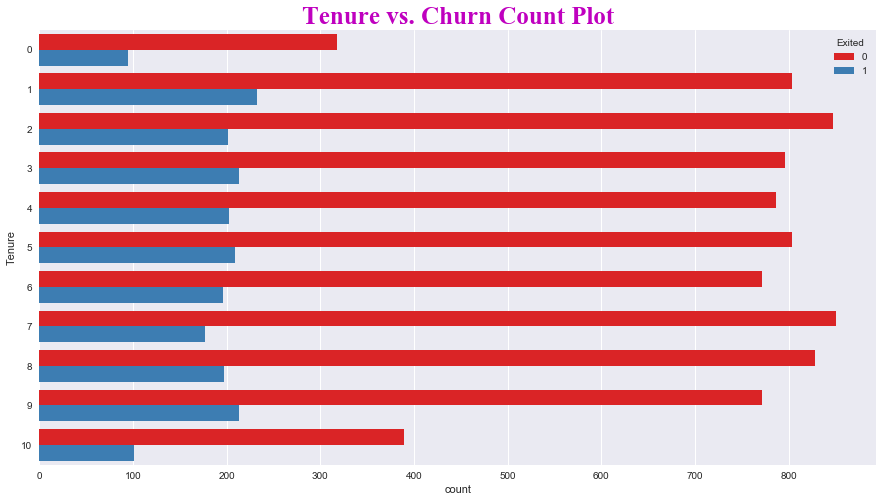

In [119]:
# Countplot
plt.figure(figsize=(15,8))
sns.countplot(data = df, 
              y = "Tenure", 
              hue = "Exited", 
              palette = "Set1",
              saturation = 0.9).set_title("Tenure vs. Churn Count Plot", 
                                          fontname = "Times New Roman", 
                                          size = 25, 
                                          color="m")

> ### $Analysis$
- We see that tenure doesn't have much impact on whether customers stay or not.
- But we do see that those who have been with the bank for less than a year and for ten years seem to stay.

Text(0.5, 1.0, 'Activity Status vs. Churn Count Plot')

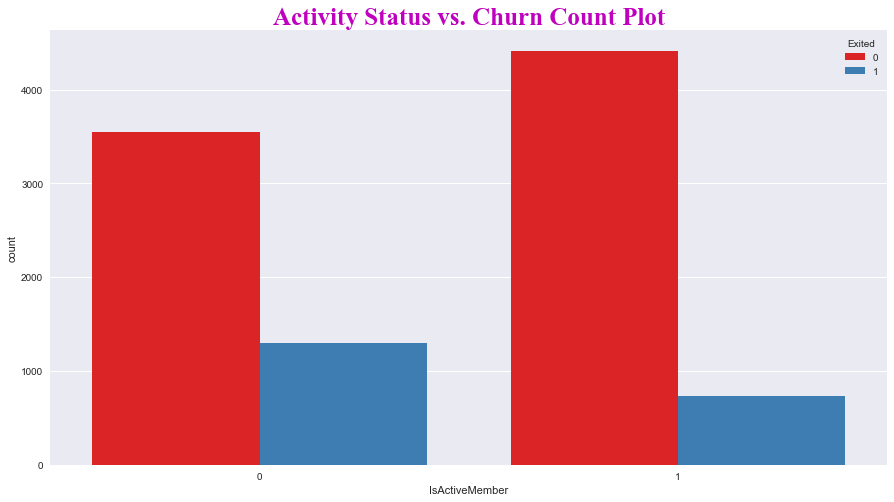

In [120]:
# Countplot
plt.figure(figsize=(15,8))
sns.countplot(data = df, 
              x = "IsActiveMember", 
              hue = "Exited", 
              palette = "Set1",
              saturation = 0.9).set_title("Activity Status vs. Churn Count Plot", 
                                          fontname = "Times New Roman", 
                                          size = 25, 
                                          color="m")

In [121]:
# Get Activity And Churn Status
# Not Active & Churn
no_act = df.query('IsActiveMember == 0 & Exited == 1')#.count()["Exited"]

# Active & Exited
act = df.query('IsActiveMember == 1 & Exited == 1')#.count()["Exited"]

# Churn Rates
no_act_churn_rate = round((no_act.Exited.count()/total_churn)*100, 2)
act_churn_rate = round((act.Exited.count()/total_churn)*100, 2)

# Create Activity Status vs. Churn DataFrame
# Generate List of Lists
act_churn_data = [['Not Active', no_act.Exited.count(), no_act_churn_rate], ['Active', act.Exited.count(), act_churn_rate]]

# Create the Pandas DataFrame
act_churn_df = pd.DataFrame(bal_churn_data, columns = ["Activity Status", "Churn Numbers","Churn Rate(%)"])
act_churn_df

,Activity Status,Churn Numbers,Churn Rate(%)
0,Zero Balance,500,24.55
1,With Balance,1537,75.45


In [122]:
# Group Data By Gender, Geography And Churn Status
select_data = df.groupby(["AgeGroup", "HasCrCard","Exited"]).count()

# Turn the grouped Data into a dataframe
select_data = pd.DataFrame(select_data["Age"])

# Rename the column 
select_data.columns = ["Count"]

select_data

Count
AgeGroup HasCrCard Exited       
adult    0         0        2137
                   1         586
         1         0        5170
                   1        1368
senior   0         0          69
                   1          12
         1         0         170
                   1          31
youth    0         0         126
                   1          15
         1         0         291
                   1          25

---
---
# 5. Feature Engineering
This is the process of selecting features which are most relevant in predicting the output variable.
- <font color='red'>$\implies$</font> It helps reduce data dimensionality and 
- <font color='red'>$\implies$</font> Ensures that models' accuracy can be trusted when those features are out. Learn more [here](https://en.wikipedia.org/wiki/Feature_selection).

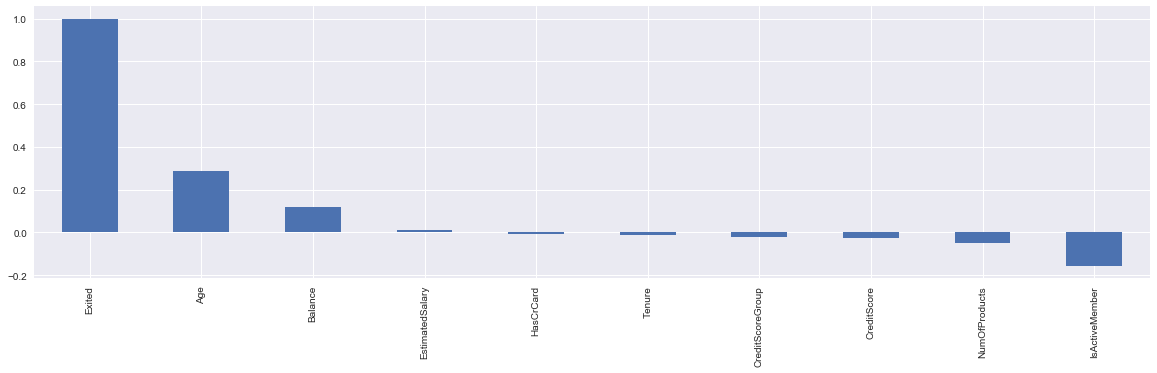

In [123]:
plt.figure(figsize=(25,10))
df.corr()["Exited"].sort_values(ascending = False).plot(kind='bar', figsize=(20,5))

> ###  Encoding Categorical Columns
- Before we can work on our models, we need to make sure all categorical columns are of numerical data type. 
    - We saw that `Geography` and `Gender` columns housed categorical values, so we need to change that as Machine Learning Models take only numerical values
    - We will also drop the new columns we added in the exploratory data analysis stage:
        - Those are `CreditScoreGroup` and `AgeGroup`

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])

In [125]:
# Drop CreditScoreGroup and AgeGroup Columns
df = df.drop(["AgeGroup", "CreditScoreGroup", "EstimatedSalary"], axis = 1)

In [126]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,0,0,42,2,0.00,1,1,1,1
1,608,2,0,41,1,83807.86,1,0,1,0
2,502,0,0,42,8,159660.80,3,1,0,1
3,699,0,0,39,1,0.00,2,0,0,0
4,850,2,0,43,2,125510.82,1,1,1,0


# 6. Train/Test Split 

In [127]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [128]:
# Split Dataset into training and testing sets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [129]:
#print('-'*48)
print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')
print('-'*49)
print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')
print('-'*49)

X_train has 8000 rows, y_train also has 8000 rows
-------------------------------------------------
X_test has 2000 rows, y_test also has 2000 rows
-------------------------------------------------


# 7. Machine Learning Model Selection, Training, Prediction and Assessment
> We will test out several models to see which one performs better.
> ## 7.1 Logistic Regression

In [142]:
# Call Logistic Regression 
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predition on test data
lr_y_pred = lr.predict(X_test)

# Model Evaluation - Accuracy Score
lr_score = accuracy_score(lr_y_pred, y_test)
lr_score

0.784

> ## 7.2 Gaussian Naive Bayes

In [143]:
# Call GaussianNB() Model 
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predition on test data
gnb_y_pred = gnb.predict(X_test)

# Model Evaluation - Accuracy Score
gnb_score = accuracy_score(gnb_y_pred, y_test)
gnb_score

0.783

> ## 7.3 Random Forest Classifier

In [144]:
# Call Model 
rf = RandomForestClassifier(n_estimators = 100, random_state = 200)

# Fit the model
rf.fit(X_train, y_train)

# Predition on test data
rf_y_pred = rf.predict(X_test)

# Model Evaluation - Accuracy Score
rf_score = accuracy_score(rf_y_pred, y_test)
rf_score

0.8645

> ## 7.4 Decision Tree Classifier

In [145]:
# Call Model 
dt = tree.DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Predition on test data
dt_y_pred = dt.predict(X_test)

# Model Evaluation - Accuracy Score
dt_score = accuracy_score(dt_y_pred, y_test)
dt_score

0.789

> ## 7.5 XGBoost Classifier

In [141]:
xg  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)
xg.fit(X_train, y_train)
xg_y_pred = xg.predict(X_test)
xg_score = accuracy_score(xg_y_pred, y_test)
xg_score

0.856

> ## 7.6 K-Nearest Neighbors Classifier (kNN)

In [140]:
# Instantiate the classifier
knn = KNeighborsClassifier()

# Fit the Model
knn.fit(X_train, y_train)

# Make Predicitions with the trained classifier
knn_y_pred = knn.predict(X_test)

# Model Evaluation/Score
knn_score = accuracy_score(knn_y_pred, y_test)
knn_score

0.755

In [148]:
knn_y_pred_prob = knn.predict_proba(X_test)

> ## 7.7 Support Vector Machine Classifier (SVM)

In [155]:
# Instantiate the SVM Model
svm = SVC(kernel = 'rbf', probability = True)

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm.predict(X_test)

# Model Evaluation/Score
svm_score = accuracy_score(svm_y_pred, y_test)
svm_score

0.7975

> ## Bonus Model:
> ## 7.8 Neural Networks
> While this  data set is relatively small, and neural networks generally require lots of training data to develop meaningful prediction capabilities, a simple neural network is employed for a quick comparison to the other approaches.

In [158]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [161]:
# instantiate Neural networks Model
nn = Sequential()

# Build up layer structure and compile model
Input_Shape = X_train.shape[1]
nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation = 'relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
nn.summary

# Set Callback to Store Model with best validation Accuracy During Training
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', model='max', verbose=0, save_best_only=True)

# Train Model and Store Best Performing Version
fit_nn = nn.fit(X_train, y_train, epochs=100, verbose=False, validation_data=(X_test, y_test),
               batch_size=30, callbacks=[mc])
best_nn = load_model('best_model.h5')

In [167]:
accuracy = nn.evaluate(X_test, y_test, verbose = False)
accuracy[1]

0.8040000200271606

# 8. Conclusion
>- We see that the best model is the Random Forest Classifier.